<a href="https://colab.research.google.com/github/luquelab/Bioinformatics-Underdogs/blob/main/Part_1_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

---

This Colab notebook contains a complete pipeline for analyzing nucleotide sequences, translating them into protein sequences, and conducting multiple sequence alignment (MSA). The outputs include key biological insights such as sequence length distributions, GC content analysis, and aligned protein sequences suitable for downstream comparative analysis.

The notebook utilizes the Biopython library for sequence handling and translation, and Clustal Omega for MSA. It builds on the Biopython package and integrates multiple tools for sequence analysis, alignment, visualization, and functi
onal prediction. It is suitable for researchers conducting comparative genomics, protein conservation analysis, or basic evolutionary studies.

#**Quick-Start Guide**

---


If this is your first time using the notebook, we recommend testing that your browser can run all cells and properly download the output files generated with the default settings. To do this, go to the **Runtime** menu and select **Run all**. Once complete, review Steps 4–6 below to interpret and download the results. If the notebook does not produce outputs, try running it on **Google Chrome** for better compatibility. If you encounter problems while adapting the notebook to your own dataset, feel free to report an issue through your preferred collaboration platform or contact the notebook maintainer.

If the test above runs successfully, follow the steps below to perform a full sequence analysis, including translation, alignment, phylogenetic reconstruction, and BLAST search. To improve navigation, open the notebook’s **Table of contents** (click **View > Table of contents** from the top bar).

---

###**Step-by-Step Workflow**


**1. Upload Your Input File**  
Upload a FASTA file named `sequences.fna` under the **Input** section. This file should contain the nucleotide sequences to be analyzed.

**2. Sequence Preprocessing**  
Run the initial code cells to:
- Load and parse sequences.
- Compute sequence lengths and GC content.
- Generate basic visualizations (e.g., histograms, boxplots).
- Translate DNA sequences into proteins.

**3. Perform Multiple Sequence Alignment (MSA)**  
Use **Clustal Omega** to align protein sequences. Run the alignment cell and save the aligned output in both FASTA and Clustal formats.

**4. Conservation & Distance Analysis**  
After alignment:
- Compute conservation scores to identify conserved regions.
- Generate a distance matrix based on sequence similarity.

**5. Phylogenetic Tree Construction**  
Build a phylogenetic tree using the UPGMA method. Save the tree in **Newick**, **PhyloXML**, and **SVG** formats.

**6. BLAST Search (NCBI nr Database)**  
Run the BLAST search to compare translated protein sequences against the NCBI `nr` database. Save the results in CSV format for further interpretation.

---

###**Outputs and Downloads**

Once the pipeline has finished running, the following files will be generated:

- `protein_sequences.fasta` – Translated protein sequences  
- `aligned_proteins.fasta` / `aligned_proteins.clustal` – Multiple sequence alignment results  
- `distance_matrix.csv` – Pairwise distance matrix  
- `blast_results.csv` – BLAST search results  
- `phylogenetic_tree.nwk` – Newick-format tree  
- `phylogenetic_tree.nhx` – PhyloXML-format tree  
- `phylogenetic_tree.svg` – Vector-based tree visualization  
- **Visualizations** – GC content plots, sequence length histograms, conservation heatmaps, phylogenetic tree graphics

---

###**Tips & Notes**

- If downloads don’t begin automatically, right-click file links or use the **Files** tab on the left to download them manually.
- You can rerun individual sections to process new input files or explore different parameters.
- For customized BLAST settings, adjust the query and database parameters in the relevant code cell.
- The pipeline is modular—feel free to skip or repeat sections as needed based on your use case.


# Install Bypython and Clustal Omega

In [8]:
# Install and import required libraries
!pip install biopython==1.80
from Bio import SeqIO
from google.colab import files

In [9]:
#Install Clustal Omega
!apt-get install -y clustalo

#Verify Installation
!clustalo --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
1.2.4


# Upload your input file

In [12]:
from Bio import SeqIO

# Load sequences from the FASTA file
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Print information for the first few sequences
for i in range(min(5, len(sequences))):  # Print for up to 5 sequences
    record = sequences[i]
    print(f"Sequence ID: {record.id}")
    print(f"Sequence Length: {len(record.seq)}")
    print(f"Sequence Snippet: {record.seq[:20]}...")  # Print first 20 bases
    print("-" * 20)

Sequence ID: Sequence_1
Sequence Length: 852
Sequence Snippet: atggcgaacaccattaacct...
--------------------
Sequence ID: Sequence_2
Sequence Length: 843
Sequence Snippet: atggcgattgatctggtggc...
--------------------
Sequence ID: Sequence_3
Sequence Length: 1053
Sequence Snippet: atgaccgtgaaagcgatggc...
--------------------
Sequence ID: Sequence_4
Sequence Length: 1494
Sequence Snippet: atgagcaaaattgcggtgat...
--------------------
Sequence ID: Sequence_5
Sequence Length: 678
Sequence Snippet: atgtgcgtgtatggctattg...
--------------------


#Length and GC Content

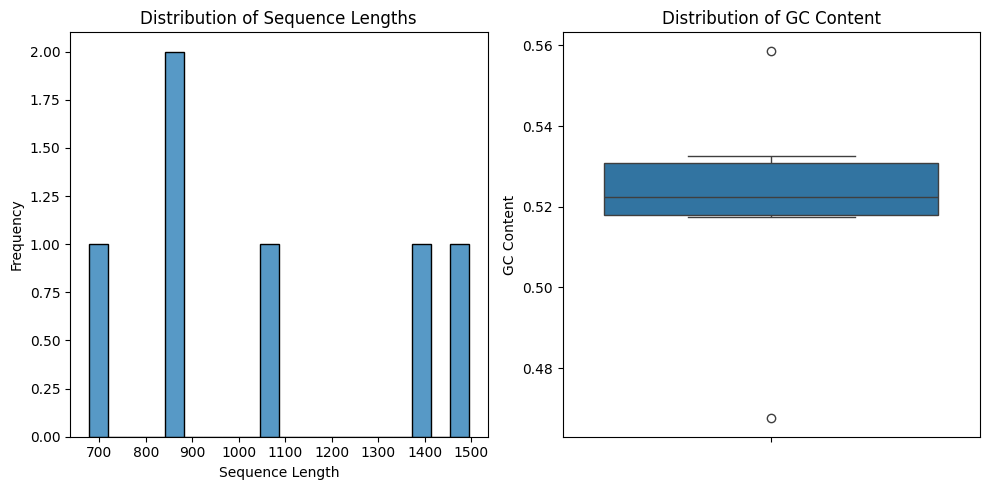

In [13]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sequences from the FASTA file
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Create a list to store sequence data
sequence_data = []
for record in sequences:
    sequence_id = record.id
    sequence_length = len(record.seq)
    gc_content = (record.seq.count('g') + record.seq.count('c')) / sequence_length
    sequence_data.append([sequence_id, sequence_length, gc_content])

# Create a pandas DataFrame
df = pd.DataFrame(sequence_data, columns=['Sequence ID', 'Sequence Length', 'GC Content'])

# DataFrame documentation
"""
DataFrame: df

Columns:
- Sequence ID: Unique identifier for each sequence.
- Sequence Length: Number of bases in the sequence.
- GC Content: Proportion of G and C bases in the sequence.
"""

# Exploratory visualizations
plt.figure(figsize=(10, 5))

# Histogram of Sequence Length
plt.subplot(1, 2, 1)
sns.histplot(df['Sequence Length'], bins=20)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Boxplot of GC Content
plt.subplot(1, 2, 2)
sns.boxplot(y=df['GC Content'])
plt.title('Distribution of GC Content')
plt.ylabel('GC Content')

plt.tight_layout()
plt.show()

#Protein Sequences

In [14]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

# Load sequences from the FASTA file
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Translate each sequence and store as new SeqRecord objects
protein_sequences = []
for record in sequences:
    protein_seq = record.seq.translate()  # Translate the nucleotide sequence
    protein_record = SeqRecord(protein_seq, id=record.id, description="Translated sequence")
    protein_sequences.append(protein_record)

# Print the first few protein sequences
for i in range(min(5, len(protein_sequences))):
    record = protein_sequences[i]
    print(f"Sequence ID: {record.id}")
    print(f"Protein Sequence: {record.seq[:20]}...")  # Print first 20 amino acids
    print("Amino Acid Length", len(record.seq))
    print("-" * 20)

    # Save the protein sequences to a new FASTA file
    SeqIO.write(protein_sequences, "protein_sequences.fasta", "fasta")

Sequence ID: Sequence_1
Protein Sequence: MANTINLVTKFAPYVDEQFT...
Amino Acid Length 284
--------------------
Sequence ID: Sequence_2
Protein Sequence: MAIDLVAKFLPYVDEMFTTE...
Amino Acid Length 281
--------------------
Sequence ID: Sequence_3
Protein Sequence: MTVKAMALNTNQLFAYLNRG...
Amino Acid Length 351
--------------------
Sequence ID: Sequence_4
Protein Sequence: MSKIAVIYARYSSDKQTEDS...
Amino Acid Length 498
--------------------
Sequence ID: Sequence_5
Protein Sequence: MCVYGYCRISTKQQSIERQI...
Amino Acid Length 226
--------------------


#Clustal Omega
This section of the code handles protein sequence alignment using the Clustal Omega tool. The process includes:

Setting up the alignment command: It defines the Clustal Omega command with parameters such as the input file (protein_sequences.fasta) and output file (aligned_proteins.fasta), along with necessary alignment options.

Running the alignment: The command is executed to perform the actual alignment of protein sequences.

Reading and displaying results: Once the alignment is complete, the output file is read, and key details like alignment content and total length are displayed.

The code aligns a set of protein sequences using Clustal Omega and presents the results for inspection. This alignment is useful for identifying conserved regions and comparing sequence similarity across proteins.

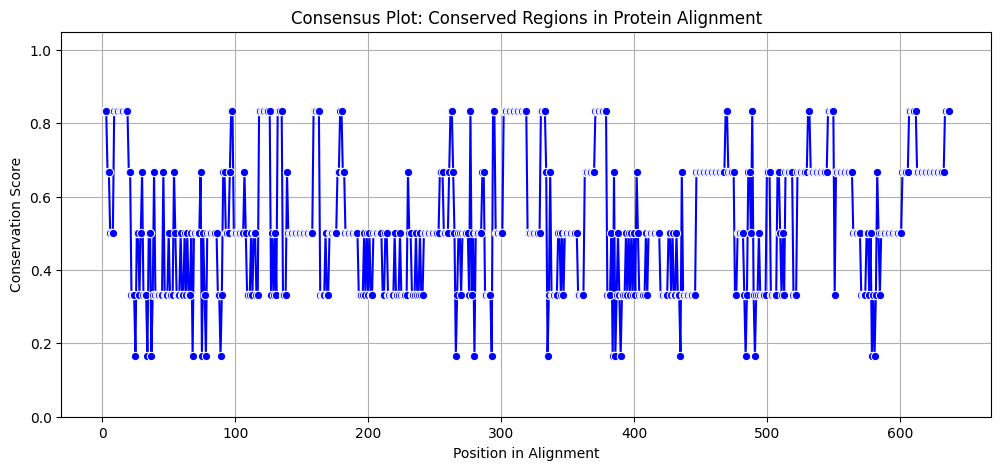

In [15]:
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO

# Perform MSA using Clustal Omega
aligned_fasta = "aligned_proteins.fasta"
protein_fasta = "protein_sequences.fasta" # Define protein_fasta with the correct file name
clustalomega_cline = ClustalOmegaCommandline(infile=protein_fasta, outfile=aligned_fasta, verbose=True, auto=True)
clustalomega_cline()

# Load the alignment
alignment = AlignIO.read(aligned_fasta, "fasta")

# Compute conservation scores
alignment_length = alignment.get_alignment_length()
conservation_scores = [0] * alignment_length

for i in range(alignment_length):
    column = [record.seq[i] for record in alignment]
    most_common = max(set(column), key=column.count)
    conservation_scores[i] = column.count(most_common) / len(column)

# Visualization
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, alignment_length + 1), y=conservation_scores, marker="o", color="blue")
plt.xlabel("Position in Alignment")
plt.ylabel("Conservation Score")
plt.title("Consensus Plot: Conserved Regions in Protein Alignment")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

#Visualizations

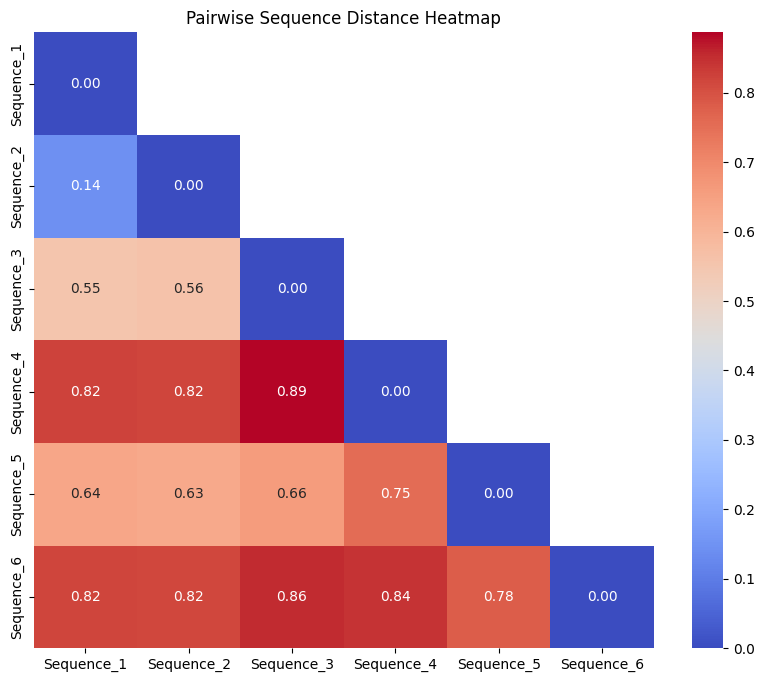

In [16]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Align import MultipleSeqAlignment

# Compute distance matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Convert to DataFrame
df_dist = pd.DataFrame(distance_matrix.matrix, index=distance_matrix.names, columns=distance_matrix.names)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_dist, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pairwise Sequence Distance Heatmap")
plt.savefig("heatmap.png")
plt.show()


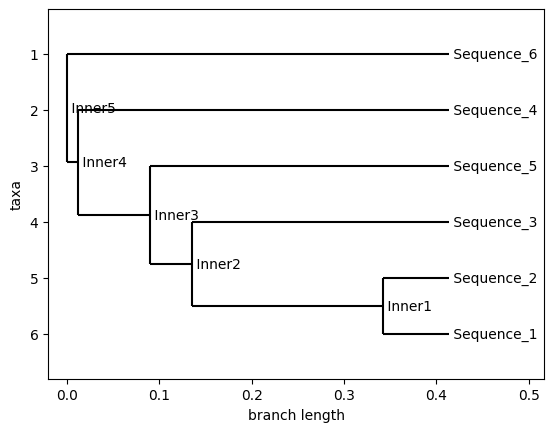

1

In [17]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import Bio.Phylo as Phylo

# Construct tree using UPGMA
constructor = DistanceTreeConstructor()
tree = constructor.upgma(distance_matrix)

# Save and visualize tree
Phylo.draw(tree)
tree_path = "phylogenetic_tree.nwk"
Phylo.write(tree, tree_path, "newick")


#BLAST searches

In [18]:
from Bio.Blast import NCBIWWW, NCBIXML

# Perform BLAST search (may take time)
blast_results = NCBIWWW.qblast("blastp", "nr", protein_sequences[0].seq)

# Parse BLAST results
blast_records = NCBIXML.read(blast_results)

# Extract relevant data
hits = []
for alignment in blast_records.alignments:
    for hsp in alignment.hsps:
        hits.append([alignment.title, hsp.expect])

# Convert to DataFrame
df_blast = pd.DataFrame(hits, columns=["Hit", "E-value"])
df_blast.to_csv("blast_results.csv", index=False)

# Display top hits
df_blast.head()


,Hit,E-value
0,tpg|DAF60711.1| MAG TPA: major capsid protein ...,0.000000e+00
1,ref|WP_325301977.1| hypothetical protein [uncu...,7.740650e-173
2,ref|WP_240287488.1| hypothetical protein [Laws...,6.706550e-171
3,gb|MBS5589747.1| hypothetical protein [Clostri...,1.074520e-170
4,ref|WP_276920628.1| hypothetical protein [Nega...,3.229950e-161


#Visualize Organism Distributions
This analysis provides a clear functional annotation and organism association for each protein sequence.
Visualizing these results helps quickly identify predominant organisms and common functional annotations, facilitating insights into biological relationships and evolutionary patterns.


Running BLAST for: Sequence_1
Running BLAST for: Sequence_2
Running BLAST for: Sequence_3
Running BLAST for: Sequence_4
Running BLAST for: Sequence_5
Running BLAST for: Sequence_6
   Protein_ID                                            Top_Hit  \
0  Sequence_1  MAG TPA: major capsid protein [Myoviridae sp. ...   
1  Sequence_2  hypothetical protein [Intestinimonas massilien...   
2  Sequence_3  major capsid protein [Escherichia coli] >pdb|3...   
3  Sequence_4         MAG TPA: integrase [Myoviridae sp. ct89I2]   
4  Sequence_5  MAG TPA: gamma delta Resolvase, site specific ...   

                                            Organism  \
0                              Myoviridae sp. ct89I2   
1  Intestinimonas massiliensis (ex Afouda et al. ...   
2                                   Escherichia coli   
3                              Myoviridae sp. ct89I2   
4                                 Caudoviricetes sp.   

                                            Function   Score        E-valu

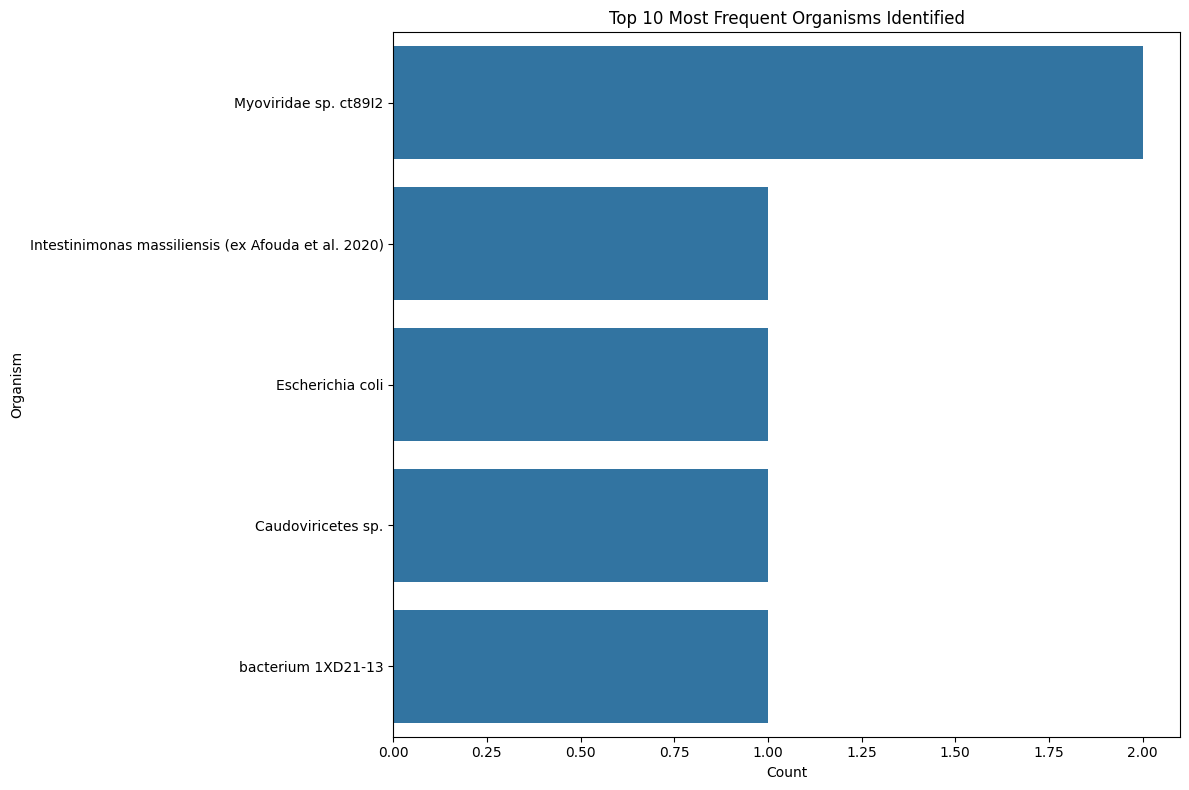

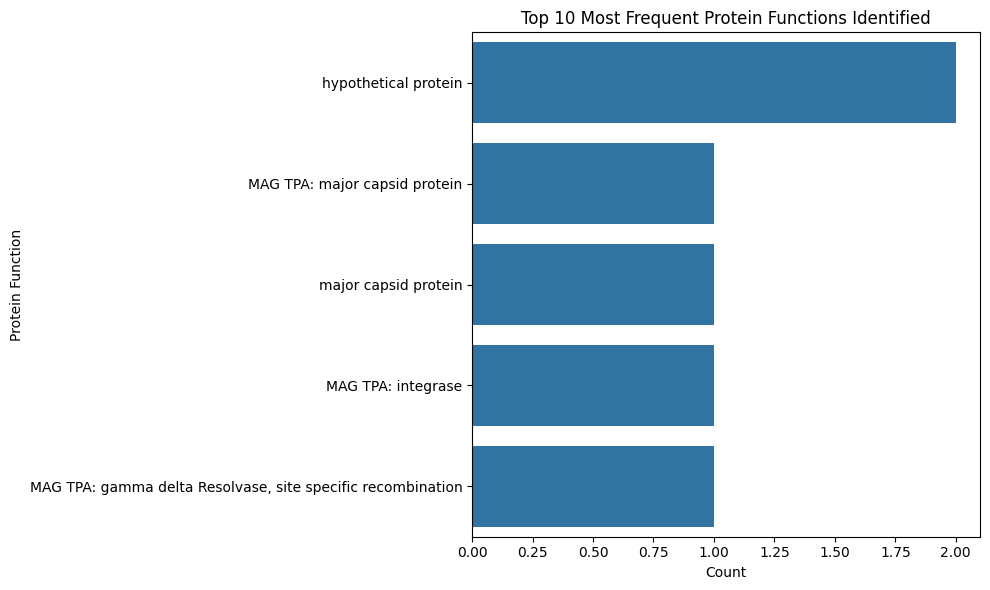

In [20]:
# Python code to perform BLAST searches and HMM searches, predict protein functions and most likely organisms of origin, and visualize organism distributions

# Step 1: Install necessary libraries
!pip install biopython matplotlib pandas seaborn

# Step 2: Import required libraries
from Bio import SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load protein sequences
sequences = list(SeqIO.parse("protein_sequences.fasta", "fasta"))

# Step 4: Perform BLAST searches against NCBI's public database
blast_results = []
for seq_record in sequences:
    print(f"Running BLAST for: {seq_record.id}")
    result_handle = NCBIWWW.qblast("blastp", "nr", seq_record.seq)
    blast_record = NCBIXML.read(result_handle)

    if blast_record.alignments:
        top_alignment = blast_record.alignments[0]
        hit_def = top_alignment.hit_def
        organism = hit_def.split('[')[-1].strip(']') if '[' in hit_def else 'Unknown'
        function_annotation = hit_def.split('[')[0].strip()
    else:
        organism = 'Unknown'
        function_annotation = 'No hits found'

    blast_results.append({
        'Protein_ID': seq_record.id,
        'Top_Hit': hit_def if blast_record.alignments else 'No hits',
        'Organism': organism,
        'Function': function_annotation,
        'Score': top_alignment.hsps[0].score if blast_record.alignments else None,
        'E-value': top_alignment.hsps[0].expect if blast_record.alignments else None
    })

# Step 5: Document results clearly in a pandas DataFrame
blast_df = pd.DataFrame(blast_results)
print(blast_df.head())

# Step 5: Visualize organism frequency distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Organism', data=blast_df, order=blast_df['Organism'].value_counts().index[:10])
plt.title('Top 10 Most Frequent Organisms Identified')
plt.xlabel('Count')
plt.ylabel('Organism')
plt.tight_layout()
plt.show()

# Step 6: Visualize function distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Function', data=blast_df, order=blast_df['Function'].value_counts().index[:10])
plt.title('Top 10 Most Frequent Protein Functions Identified')
plt.xlabel('Count')
plt.ylabel('Protein Function')
plt.tight_layout()
plt.show()

# Rationale Comment:
# This analysis provides a clear functional annotation and organism association for each protein sequence.
# Visualizing these results helps quickly identify predominant organisms and common functional annotations, facilitating insights into biological relationships and evolutionary patterns.


#Sequence Functions and Organisms Per Sequence

In [21]:
# Import additional modules needed
from collections import Counter
import re

# Helper function to clean and tokenize text
def tokenize(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove punctuation
    return text.lower().split()

# Dictionary to store top 5 functions and organisms per sequence
top5_functions = {}
top5_organisms = {}

for seq_id in blast_df['Protein_ID'].unique():
    # Get all BLAST hits descriptions for current protein
    hits = blast_df[blast_df['Protein_ID'] == seq_id]['Top_Hit'].tolist()

    # Aggregate words for functions and organisms separately
    function_words = []
    organism_names = []

    for hit in hits:
        if hit != 'No hits':
            # Split into function and organism
            if '[' in hit:
                function_text = hit.split('[')[0].strip()
                organism_text = hit.split('[')[-1].strip(']')
            else:
                function_text = hit
                organism_text = 'Unknown'

            # Tokenize and aggregate words
            function_words += tokenize(function_text)
            organism_names.append(organism_text.strip())

    # Count occurrences for functions and organisms
    function_counter = Counter(function_words)
    organism_counter = Counter(organism_names)

    # Store top 5 most common
    top5_functions[seq_id] = function_counter.most_common(5)
    top5_organisms[seq_id] = organism_counter.most_common(5)

# Clearly print top 5 results for each sequence using f-strings
print("\n=== Top 5 Likely Functions and Organisms per Sequence ===\n")

for seq_id in blast_df['Protein_ID'].unique():
    print(f"Sequence ID: {seq_id}")

    # Functions
    functions = ', '.join([f"{word} ({count})" for word, count in top5_functions[seq_id]])
    print(f"  → Top Functions: {functions if functions else 'No hits found'}")

    # Organisms
    organisms = ', '.join([f"{org} ({count})" for org, count in top5_organisms[seq_id]])
    print(f"  → Top Organisms: {organisms if organisms else 'No hits found'}\n")



=== Top 5 Likely Functions and Organisms per Sequence ===

Sequence ID: Sequence_1
  → Top Functions: mag (1), tpa (1), major (1), capsid (1), protein (1)
  → Top Organisms: Myoviridae sp. ct89I2 (1)

Sequence ID: Sequence_2
  → Top Functions: hypothetical (1), protein (1)
  → Top Organisms: Intestinimonas massiliensis (ex Afouda et al. 2020) (1)

Sequence ID: Sequence_3
  → Top Functions: major (1), capsid (1), protein (1)
  → Top Organisms: Escherichia coli (1)

Sequence ID: Sequence_4
  → Top Functions: mag (1), tpa (1), integrase (1)
  → Top Organisms: Myoviridae sp. ct89I2 (1)

Sequence ID: Sequence_5
  → Top Functions: mag (1), tpa (1), gamma (1), delta (1), resolvase (1)
  → Top Organisms: Caudoviricetes sp. (1)

Sequence ID: Sequence_6
  → Top Functions: hypothetical (1), protein (1)
  → Top Organisms: bacterium 1XD21-13 (1)

